#!pip install matplotlib 
#!pip install nltk

In [2]:
# nltk (Natural Language Toolkit).
# .json
# pandas (para el manejo de datos tabulares).
# ast (para evaluar literales en línea).

import nltk
import json
import pandas as pd
import ast
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq



In [3]:
# Primer archivo .json descomprimido para procesar australian_users_items.json 
# Se crea una lista vacía.
reviews = []

# Nombre del archivo JSON que deseas abrir, "r" como cadena cruda (raw string).
archivo_json = r'C:\Users\juana\Desktop\Cursos Python\HENRY\Proyecto 1\DATASET\australian_users_items.json'

# Usando la biblioteca json (ast.literal_eval analiza cada linea), "r" a modo lectura de codificación UTF-8
with open(archivo_json, 'r', encoding='utf-8') as archivo:
    for line in archivo:
        reviews.append(ast.literal_eval(line))

# Crear un DataFrame a partir de las reviews
df_australian_users_items = pd.DataFrame(reviews)

# Mostrar el DataFrame
print(df_australian_users_items)


                       user_id  items_count           steam_id  \
0            76561197970982479          277  76561197970982479   
1                      js41637          888  76561198035864385   
2                    evcentric          137  76561198007712555   
3                   Riot-Punch          328  76561197963445855   
4                        doctr          541  76561198002099482   
...                        ...          ...                ...   
88305        76561198323066619           22  76561198323066619   
88306        76561198326700687          177  76561198326700687   
88307  XxLaughingJackClown77xX            0  76561198328759259   
88308        76561198329548331            7  76561198329548331   
88309        edward_tremethick            0  76561198331598578   

                                                user_url  \
0      http://steamcommunity.com/profiles/76561197970...   
1                   http://steamcommunity.com/id/js41637   
2                 http://st

Contiene 5 columnas con 88310 filas:
- `user_id`: Contiene identificadores de usuarios.
- `items_count`: Muestra el recuento de elementos relacionados con cada usuario.
- `steam_id`: Contiene identificadores de Steam.
- `user_url`: Enlaza a las URL de los perfiles de usuarios de Steam.
- `items`: Datos adicionales en formato JSON relacionados con los elementos asociados a cada usuario.


In [4]:
df_australian_users_items.columns

Index(['user_id', 'items_count', 'steam_id', 'user_url', 'items'], dtype='object')

In [6]:

# Usa el método "describe" para obtener estadísticas descriptivas de la columna "items_count".
descripcion = df_australian_users_items['items_count'].describe()

# Imprime la descripción en la consola.
print(descripcion)


count    88310.000000
mean        58.353629
std        122.312095
min          0.000000
25%          3.000000
50%         26.000000
75%         73.000000
max       7762.000000
Name: items_count, dtype: float64


In [7]:
# Cantidad de valores nulos (NaN) en el DataFrame
nulos = df_australian_users_items.isna().sum().sum()

# Cantidad de valores repetidos en la columna 'id'
repetidos = df_australian_users_items['user_id'].duplicated().sum()

# Cantidad de celdas vacías en el DataFrame
celdas_vacias = df_australian_users_items.isnull().sum().sum()

print("Cantidad de valores nulos (NaN):", nulos)
print("Cantidad de valores repetidos en la columna 'id':", repetidos)
print("Cantidad de celdas vacías:", celdas_vacias)


Cantidad de valores nulos (NaN): 0
Cantidad de valores repetidos en la columna 'id': 684
Cantidad de celdas vacías: 0


In [8]:

# Encuentra los "id" repetidos y cuántas veces se repiten
id_repetidos = df_australian_users_items['user_id'][df_australian_users_items['user_id'].duplicated(keep=False)]
conteo_repeticiones = id_repetidos.value_counts()

# Filtra los "id" repetidos que se repiten al menos dos veces
id_repetidos = conteo_repeticiones[conteo_repeticiones >= 2].index

# Imprime los "id" repetidos y cuántas veces se repiten
print("ID repetidos y su frecuencia de repetición:")
print(conteo_repeticiones)



ID repetidos y su frecuencia de repetición:
user_id
76561198081666970    3
76561198056857968    3
76561198094973305    3
76561198051777058    3
76561198309337430    3
                    ..
76561198073297020    2
76561198154576540    2
dannysfatass         2
srgeron              2
farquadian           2
Name: count, Length: 673, dtype: int64


In [9]:

# Identificar los "id" repetidos
ids_repetidos = df_australian_users_items[df_australian_users_items['user_id'].duplicated(keep=False)]

# Filtrar dos filas con el mismo "user_id"
id_ejemplo = '76561198081666970'  # "id" a investigar

# Filtrar las filas correspondientes a un "user_id" específico
filas_id_ejemplo = df_australian_users_items[df_australian_users_items['user_id'] == id_ejemplo]

# Mostrar las filas para inspección
print(filas_id_ejemplo)


                 user_id  items_count           steam_id  \
3737   76561198081666970           46  76561198081666970   
14296  76561198081666970           46  76561198081666970   
35222  76561198081666970           46  76561198081666970   

                                                user_url  \
3737   http://steamcommunity.com/profiles/76561198081...   
14296  http://steamcommunity.com/profiles/76561198081...   
35222  http://steamcommunity.com/profiles/76561198081...   

                                                   items  
3737   [{'item_id': '4000', 'item_name': 'Garry's Mod...  
14296  [{'item_id': '4000', 'item_name': 'Garry's Mod...  
35222  [{'item_id': '4000', 'item_name': 'Garry's Mod...  


In [10]:

# Eliminar filas con "id" repetidos y mantener la primera aparición
df_sin_repetidos = df_australian_users_items.drop_duplicates(subset='user_id', keep='first')

# Imprimir el DataFrame resultante
print(df_sin_repetidos)


                       user_id  items_count           steam_id  \
0            76561197970982479          277  76561197970982479   
1                      js41637          888  76561198035864385   
2                    evcentric          137  76561198007712555   
3                   Riot-Punch          328  76561197963445855   
4                        doctr          541  76561198002099482   
...                        ...          ...                ...   
88305        76561198323066619           22  76561198323066619   
88306        76561198326700687          177  76561198326700687   
88307  XxLaughingJackClown77xX            0  76561198328759259   
88308        76561198329548331            7  76561198329548331   
88309        edward_tremethick            0  76561198331598578   

                                                user_url  \
0      http://steamcommunity.com/profiles/76561197970...   
1                   http://steamcommunity.com/id/js41637   
2                 http://st

In [11]:
df_australian_users_items = df_sin_repetidos

In [12]:
# Cantidad de valores repetidos en la columna 'id'
repetidos = df_australian_users_items['user_id'].duplicated().sum()
print("Cantidad de valores repetidos en la columna 'id':", repetidos)

Cantidad de valores repetidos en la columna 'id': 0


In [13]:
df_australian_users_items.columns

Index(['user_id', 'items_count', 'steam_id', 'user_url', 'items'], dtype='object')

In [14]:
# False = puede tener datos nulos o faltantes (no hay celdas vacias ni NaN)
print(df_australian_users_items[['user_id', 'items_count', 'steam_id', 'user_url', 'items']].all(axis=0))


user_id         True
items_count    False
steam_id        True
user_url        True
items          False
dtype: bool


In [15]:
import matplotlib.pyplot as plt

# Supongamos que quieres analizar la columna 'items_count'
#plt.boxplot(df_australian_users_items['items_count'])
#plt.title('Boxplot de items_count')
#plt.show()


In [17]:
# Calcula el primer y tercer cuartil
#q1 = df_australian_users_items['items_count'].quantile(0.25)
#q3 = df_australian_users_items['items_count'].quantile(0.75)

# Calcula el rango intercuartílico (IQR)
#iqr = q3 - q1

# Define los límites para los valores atípicos
#lower_bound = q1 - 1.5 * iqr
#upper_bound = q3 + 1.5 * iqr

# Encuentra los valores atípicos
#outliers = df_australian_users_items[(df_australian_users_items['items_count'] < lower_bound) | (df_australian_users_items['items_count'] > upper_bound)]

# Muestra los valores atípicos
#print("Valores atípicos:")
#print(outliers)

# Calcular el porcentaje de valores atípicos
#porcentaje_valores_atipicos = (len(outliers) / len(df_australian_users_items)) * 100
#print(f"Porcentaje de valores atípicos: {porcentaje_valores_atipicos:.2f}%")

# Elimina los valores atípicos del DataFrame original
#df_sin_atipicos = df_australian_users_items[~df_australian_users_items['items_count'].isin(outliers['items_count'])]



In [18]:
#df_australian_users_items = df_sin_atipicos

In [16]:
df_australian_users_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87626 entries, 0 to 88309
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      87626 non-null  object
 1   items_count  87626 non-null  int64 
 2   steam_id     87626 non-null  object
 3   user_url     87626 non-null  object
 4   items        87626 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.0+ MB


In [17]:
df_australian_users_items.columns

Index(['user_id', 'items_count', 'steam_id', 'user_url', 'items'], dtype='object')

In [18]:
print(df_australian_users_items['items'])


0        [{'item_id': '10', 'item_name': 'Counter-Strik...
1        [{'item_id': '10', 'item_name': 'Counter-Strik...
2        [{'item_id': '1200', 'item_name': 'Red Orchest...
3        [{'item_id': '10', 'item_name': 'Counter-Strik...
4        [{'item_id': '300', 'item_name': 'Day of Defea...
                               ...                        
88305    [{'item_id': '413850', 'item_name': 'CS:GO Pla...
88306    [{'item_id': '11020', 'item_name': 'TrackMania...
88307                                                   []
88308    [{'item_id': '304930', 'item_name': 'Unturned'...
88309                                                   []
Name: items, Length: 87626, dtype: object


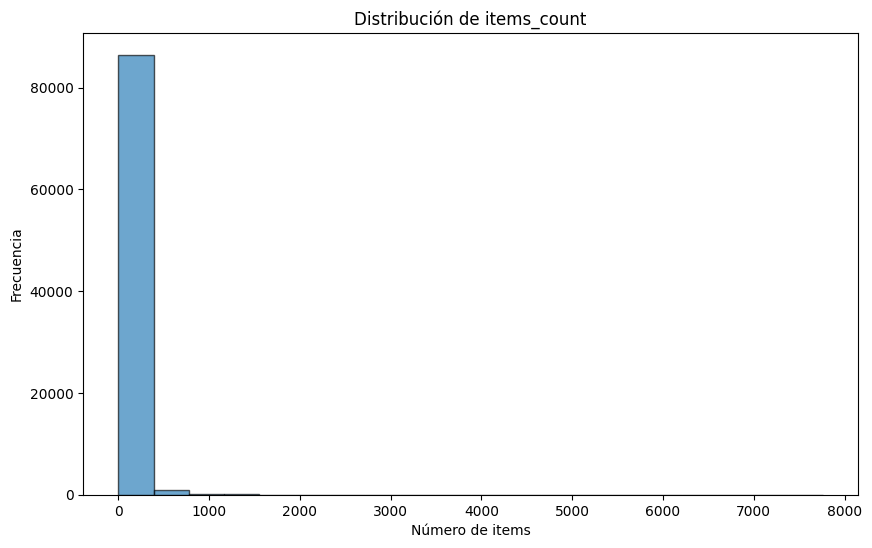

In [22]:

# Selecciona la columna 'items_count' de tu DataFrame sin outliers
data = df_australian_users_items['items_count']

# Configura el tamaño del gráfico y las etiquetas
plt.figure(figsize=(10, 6))
plt.title('Distribución de items_count')
plt.xlabel('Número de items')
plt.ylabel('Frecuencia')

# Crea el histograma
plt.hist(data, bins=20, edgecolor='k', alpha=0.65)

# Muestra el histograma
plt.show()


In [19]:
df_australian_users_items

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."
...,...,...,...,...,...
88305,76561198323066619,22,76561198323066619,http://steamcommunity.com/profiles/76561198323...,"[{'item_id': '413850', 'item_name': 'CS:GO Pla..."
88306,76561198326700687,177,76561198326700687,http://steamcommunity.com/profiles/76561198326...,"[{'item_id': '11020', 'item_name': 'TrackMania..."
88307,XxLaughingJackClown77xX,0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...,[]
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"[{'item_id': '304930', 'item_name': 'Unturned'..."


In [20]:
# Utilización de la función lambda 
# Crea una nueva columna llamada 'playtime_forever'. Esta columna se llena con el valor de 'playtime_forever' extraído del primer 
# elemento de la lista en la columna 'items'. Si 'items' está vacío (longitud igual a cero), se asigna cero a 'playtime_forever'. 
# Esto convierte los datos de 'playtime_forever' en enteros.

#Similar al paso anterior, crea una nueva columna llamada 'playtime_2weeks'. Esta columna se llena con el valor de 'playtime_2weeks' 
# extraído del primer elemento de la lista en la columna 'items'. Si 'items' está vacío, se asigna cero a 'playtime_2weeks'.

#De manera similar, crea una nueva columna llamada 'item_id' y la llena con el valor de 'item_id' extraído del primer elemento de 
# la lista en la columna 'items'. Si 'items' está vacío, se asigna cero a 'item_id'.

#Convierte la columna 'playtime_forever' en un tipo de dato entero (int).

#De manera similar, convierte la columna 'playtime_2weeks' en un tipo de dato entero (int).

df_australian_users_items['playtime_forever'] = df_australian_users_items['items'].apply(lambda x: x[0].get('playtime_forever') if len(x) > 0 else 0)
df_australian_users_items['playtime_2weeks'] = df_australian_users_items['items'].apply(lambda x: x[0].get('playtime_2weeks') if len(x) > 0 else 0)
df_australian_users_items['item_id'] = df_australian_users_items['items'].apply(lambda x: x[0].get('item_id') if len(x) > 0 else 0)
df_australian_users_items['playtime_forever'] = df_australian_users_items['playtime_forever'].astype(int)
df_australian_users_items['playtime_2weeks'] = df_australian_users_items['playtime_2weeks'].astype(int)


In [33]:
df_australian_users_items

,user_id,items_count,steam_id,items,playtime_forever,playtime_2weeks,item_id
0,76561197970982479,277,76561197970982479,"{'item_id': '10', 'item_name': 'Counter-Strike...",6,0,10
0,76561197970982479,277,76561197970982479,"{'item_id': '20', 'item_name': 'Team Fortress ...",0,0,20
0,76561197970982479,277,76561197970982479,"{'item_id': '30', 'item_name': 'Day of Defeat'...",7,0,30
0,76561197970982479,277,76561197970982479,"{'item_id': '40', 'item_name': 'Deathmatch Cla...",0,0,40
0,76561197970982479,277,76561197970982479,"{'item_id': '50', 'item_name': 'Half-Life: Opp...",0,0,50
...,...,...,...,...,...,...,...
88308,76561198329548331,7,76561198329548331,"{'item_id': '373330', 'item_name': 'All Is Dus...",0,0,373330
88308,76561198329548331,7,76561198329548331,"{'item_id': '388490', 'item_name': 'One Way To...",3,3,388490
88308,76561198329548331,7,76561198329548331,"{'item_id': '521570', 'item_name': 'You Have 1...",4,4,521570
88308,76561198329548331,7,76561198329548331,"{'item_id': '519140', 'item_name': 'Minds Eyes...",3,3,519140


In [21]:
df_australian_users_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87626 entries, 0 to 88309
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           87626 non-null  object
 1   items_count       87626 non-null  int64 
 2   steam_id          87626 non-null  object
 3   user_url          87626 non-null  object
 4   items             87626 non-null  object
 5   playtime_forever  87626 non-null  int32 
 6   playtime_2weeks   87626 non-null  int32 
 7   item_id           87626 non-null  object
dtypes: int32(2), int64(1), object(5)
memory usage: 5.3+ MB


In [22]:
df_australian_users_items

,user_id,items_count,steam_id,user_url,items,playtime_forever,playtime_2weeks,item_id
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik...",6,0,10
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik...",0,0,10
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest...",923,0,1200
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik...",0,0,10
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea...",1131,0,300
...,...,...,...,...,...,...,...,...
88305,76561198323066619,22,76561198323066619,http://steamcommunity.com/profiles/76561198323...,"[{'item_id': '413850', 'item_name': 'CS:GO Pla...",0,0,413850
88306,76561198326700687,177,76561198326700687,http://steamcommunity.com/profiles/76561198326...,"[{'item_id': '11020', 'item_name': 'TrackMania...",0,0,11020
88307,XxLaughingJackClown77xX,0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...,[],0,0,0
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"[{'item_id': '304930', 'item_name': 'Unturned'...",677,677,304930


In [23]:
# quito las columnas que no voy a ocupar
df_australian_users_items.drop(['user_url'], axis=1, inplace=True)

In [24]:
df_australian_users_items

,user_id,items_count,steam_id,items,playtime_forever,playtime_2weeks,item_id
0,76561197970982479,277,76561197970982479,"[{'item_id': '10', 'item_name': 'Counter-Strik...",6,0,10
1,js41637,888,76561198035864385,"[{'item_id': '10', 'item_name': 'Counter-Strik...",0,0,10
2,evcentric,137,76561198007712555,"[{'item_id': '1200', 'item_name': 'Red Orchest...",923,0,1200
3,Riot-Punch,328,76561197963445855,"[{'item_id': '10', 'item_name': 'Counter-Strik...",0,0,10
4,doctr,541,76561198002099482,"[{'item_id': '300', 'item_name': 'Day of Defea...",1131,0,300
...,...,...,...,...,...,...,...
88305,76561198323066619,22,76561198323066619,"[{'item_id': '413850', 'item_name': 'CS:GO Pla...",0,0,413850
88306,76561198326700687,177,76561198326700687,"[{'item_id': '11020', 'item_name': 'TrackMania...",0,0,11020
88307,XxLaughingJackClown77xX,0,76561198328759259,[],0,0,0
88308,76561198329548331,7,76561198329548331,"[{'item_id': '304930', 'item_name': 'Unturned'...",677,677,304930


In [25]:
df_australian_users_items = df_australian_users_items.explode('items')


In [26]:
df_australian_users_items.columns

Index(['user_id', 'items_count', 'steam_id', 'items', 'playtime_forever',
       'playtime_2weeks', 'item_id'],
      dtype='object')

In [27]:
df_australian_users_items

,user_id,items_count,steam_id,items,playtime_forever,playtime_2weeks,item_id
0,76561197970982479,277,76561197970982479,"{'item_id': '10', 'item_name': 'Counter-Strike...",6,0,10
0,76561197970982479,277,76561197970982479,"{'item_id': '20', 'item_name': 'Team Fortress ...",6,0,10
0,76561197970982479,277,76561197970982479,"{'item_id': '30', 'item_name': 'Day of Defeat'...",6,0,10
0,76561197970982479,277,76561197970982479,"{'item_id': '40', 'item_name': 'Deathmatch Cla...",6,0,10
0,76561197970982479,277,76561197970982479,"{'item_id': '50', 'item_name': 'Half-Life: Opp...",6,0,10
...,...,...,...,...,...,...,...
88308,76561198329548331,7,76561198329548331,"{'item_id': '373330', 'item_name': 'All Is Dus...",677,677,304930
88308,76561198329548331,7,76561198329548331,"{'item_id': '388490', 'item_name': 'One Way To...",677,677,304930
88308,76561198329548331,7,76561198329548331,"{'item_id': '521570', 'item_name': 'You Have 1...",677,677,304930
88308,76561198329548331,7,76561198329548331,"{'item_id': '519140', 'item_name': 'Minds Eyes...",677,677,304930


In [30]:

# Gurardo este nuevo DataFrame en un archivo CSV
df_australian_users_items.to_csv('datos_items.csv', index=False)


In [31]:
# Convertir la columna 'item_id' a cadena de texto (str)
df_australian_users_items['item_id'] = df_australian_users_items['item_id'].astype(str)

# DataFrame 'df_australian_users_items' se guarda como archivo .parquet
table = pa.Table.from_pandas(df_australian_users_items)
pq.write_table(table, 'datos_items.parquet')


OTRO ARCHIVO .json REVIEWS 

In [32]:
reviews = []

# Nombre del archivo JSON que deseas abrir
archivo_json = r'C:\Users\juana\Desktop\Cursos Python\HENRY\Proyecto 1\DATASET\australian_user_reviews.json'

# Usando la biblioteca json con especificación de codificación UTF-8
with open(archivo_json, 'r', encoding='utf-8') as archivo:
    for line in archivo:
        reviews.append(ast.literal_eval(line))

# Crear un DataFrame a partir de las reviews
df_user_reviews = pd.DataFrame(reviews)

# Mostrar el DataFrame
print(df_user_reviews)


                 user_id                                           user_url  \
0      76561197970982479  http://steamcommunity.com/profiles/76561197970...   
1                js41637               http://steamcommunity.com/id/js41637   
2              evcentric             http://steamcommunity.com/id/evcentric   
3                  doctr                 http://steamcommunity.com/id/doctr   
4              maplemage             http://steamcommunity.com/id/maplemage   
...                  ...                                                ...   
25794  76561198306599751  http://steamcommunity.com/profiles/76561198306...   
25795           Ghoustik              http://steamcommunity.com/id/Ghoustik   
25796  76561198310819422  http://steamcommunity.com/profiles/76561198310...   
25797  76561198312638244  http://steamcommunity.com/profiles/76561198312...   
25798        LydiaMorley           http://steamcommunity.com/id/LydiaMorley   

                                                 re

In [33]:
df_user_reviews.columns

Index(['user_id', 'user_url', 'reviews'], dtype='object')


1. **Columna 'steam_id':** Contiene identificadores de usuarios de Steam. Los valores parecen ser enlaces a perfiles de usuarios de Steam.

2. **Columna 'user_url':** Contiene URL a los perfiles de usuarios de Steam. Estos enlaces te llevarían a los perfiles de los usuarios en el sitio web de Steam.

3. **Columna 'reviews':** Contiene revisiones de usuarios. Cada revisión es un diccionario que puede incluir campos como 'funny' (gracioso), 'posted' (publicado) y 'last edited' (última edición), entre otros.



In [34]:
# revisión de valores nulos
df_user_reviews.isna().sum()

user_id     0
user_url    0
reviews     0
dtype: int64

In [35]:
df_user_reviews.columns

Index(['user_id', 'user_url', 'reviews'], dtype='object')

In [36]:
#Eliminar las columnas que no vamos a utilizar para nuestro modelo
df_user_reviews = df_user_reviews.drop(['user_url'], axis=1)

In [37]:
# desanidar el diccionario de la columna reviews
desanidando = df_user_reviews.explode('reviews') # cada elemento de la lista en la columna 'reviews' se convierte en una fila separada, y las demás columnas se replican en cada fila resultante.
df_reviews_user = pd.concat([desanidando.drop(['reviews'], axis=1), desanidando['reviews'].apply(pd.Series)], axis=1) # combinar las columnas del DataFrame desanidando con las columnas de una nueva tabla que se crea a partir de la columna 'reviews' del DataFrame desanidando.

In [38]:
desanidando

,user_id,reviews
0,76561197970982479,"{'funny': '', 'posted': 'Posted November 5, 20..."
0,76561197970982479,"{'funny': '', 'posted': 'Posted July 15, 2011...."
0,76561197970982479,"{'funny': '', 'posted': 'Posted April 21, 2011..."
1,js41637,"{'funny': '', 'posted': 'Posted June 24, 2014...."
1,js41637,"{'funny': '', 'posted': 'Posted September 8, 2..."
...,...,...
25797,76561198312638244,"{'funny': '', 'posted': 'Posted July 10.', 'la..."
25797,76561198312638244,"{'funny': '', 'posted': 'Posted July 8.', 'las..."
25798,LydiaMorley,"{'funny': '1 person found this review funny', ..."
25798,LydiaMorley,"{'funny': '', 'posted': 'Posted July 20.', 'la..."


In [39]:
df_user_reviews = df_reviews_user
df_user_reviews

,user_id,funny,posted,last_edited,item_id,helpful,recommend,review,0
0,76561197970982479,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,NaN
0,76561197970982479,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,NaN
0,76561197970982479,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,NaN
1,js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,NaN
1,js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,NaN
...,...,...,...,...,...,...,...,...,...
25797,76561198312638244,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...,NaN
25797,76561198312638244,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...,NaN
25798,LydiaMorley,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,NaN
25798,LydiaMorley,,Posted July 20.,,730,No ratings yet,True,:D,NaN


In [40]:
df_user_reviews.columns

Index([    'user_id',       'funny',      'posted', 'last_edited',
           'item_id',     'helpful',   'recommend',      'review',
                   0],
      dtype='object')

In [41]:

df_user_reviews = df_user_reviews.drop(df_user_reviews.columns[-1], axis=1) # eliminar la última columna del DataFrame df_reviews_user
df_user_reviews.drop(['funny', 'last_edited'], axis=1, inplace=True) # eliminar las columnas 'funny' y 'last_edited' del DataFrame df_reviews_user

In [42]:
df_user_reviews

,user_id,posted,item_id,helpful,recommend,review
0,76561197970982479,"Posted November 5, 2011.",1250,No ratings yet,True,Simple yet with great replayability. In my opi...
0,76561197970982479,"Posted July 15, 2011.",22200,No ratings yet,True,It's unique and worth a playthrough.
0,76561197970982479,"Posted April 21, 2011.",43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
1,js41637,"Posted June 24, 2014.",251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
1,js41637,"Posted September 8, 2013.",227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...,...
25797,76561198312638244,Posted July 10.,70,No ratings yet,True,a must have classic from steam definitely wort...
25797,76561198312638244,Posted July 8.,362890,No ratings yet,True,this game is a perfect remake of the original ...
25798,LydiaMorley,Posted July 3.,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...
25798,LydiaMorley,Posted July 20.,730,No ratings yet,True,:D


In [43]:

df_user_reviews['year_posted'] = df_user_reviews['posted'].str.extract(r'(\d{4})') # extraer el año de la columna 'posted' y almacenarlo en una nueva columna 'year_posted'

df_user_reviews.drop('posted' , axis = 1, inplace = True) # eliminar la columna 'posted' del DataFrame df_reviews_user

In [44]:
df_user_reviews

,user_id,item_id,helpful,recommend,review,year_posted
0,76561197970982479,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,2011
0,76561197970982479,22200,No ratings yet,True,It's unique and worth a playthrough.,2011
0,76561197970982479,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,2011
1,js41637,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,2014
1,js41637,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,2013
...,...,...,...,...,...,...
25797,76561198312638244,70,No ratings yet,True,a must have classic from steam definitely wort...,NaN
25797,76561198312638244,362890,No ratings yet,True,this game is a perfect remake of the original ...,NaN
25798,LydiaMorley,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,NaN
25798,LydiaMorley,730,No ratings yet,True,:D,NaN


In [45]:
nltk.download('vader_lexicon') # descarga del diccionario vader_lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer # importar el analizador de sentimientos vader

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\juana\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [46]:
analizador_sentimientos = SentimentIntensityAnalyzer() # inicializar el analizador de sentimientos vader

def puntaje_sentimiento(texto): 
    if pd.isnull(texto) or texto == '':
        return 1  # Retorna 1 si el texto es nulo o vacío
    elif isinstance(texto, str):
        sentimiento = analizador_sentimientos.polarity_scores(texto) 
        puntaje_compuesto = sentimiento['compound'] 
        if puntaje_compuesto >= -0.05: # si el puntaje compuesto es mayor o igual a -0.05, se considera un buen puntaje
            return 2  
        elif puntaje_compuesto <= -0.05: # si el puntaje compuesto es menor o igual a -0.05, se considera un mal puntaje
            return 0 
        else:
            return 1
    else:
        return 1 # Retorna 1 si el texto no es un string

In [47]:
df_user_reviews.columns

Index(['user_id', 'item_id', 'helpful', 'recommend', 'review', 'year_posted'], dtype='object')

In [48]:
# convertir la columna 'review' en string
df_user_reviews['review'] = df_user_reviews['review'].astype(str) 

# aplicar la función puntaje_sentimiento a la columna 'review' y almacenar el resultado en la columna 'sentiment_score'.
df_user_reviews['sentiment_score'] = df_user_reviews['review'].apply(puntaje_sentimiento) 


df_user_reviews


,user_id,item_id,helpful,recommend,review,year_posted,sentiment_score
0,76561197970982479,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,2011,2
0,76561197970982479,22200,No ratings yet,True,It's unique and worth a playthrough.,2011,2
0,76561197970982479,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,2011,2
1,js41637,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,2014,2
1,js41637,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,2013,2
...,...,...,...,...,...,...,...
25797,76561198312638244,70,No ratings yet,True,a must have classic from steam definitely wort...,NaN,2
25797,76561198312638244,362890,No ratings yet,True,this game is a perfect remake of the original ...,NaN,2
25798,LydiaMorley,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,NaN,2
25798,LydiaMorley,730,No ratings yet,True,:D,NaN,2


In [49]:
# revisamos los valores nulos
df_user_reviews.isnull().sum()

user_id                0
item_id               28
helpful               28
recommend             28
review                 0
year_posted        10147
sentiment_score        0
dtype: int64

In [50]:
# Para las columnas 'item_id', 'helpful' y 'recommend' eliminamos los registros que tengan valores nulos
df_user_reviews.dropna(subset=['item_id', 'helpful', 'recommend'], inplace=True)

In [51]:
df_user_reviews.columns

Index(['user_id', 'item_id', 'helpful', 'recommend', 'review', 'year_posted',
       'sentiment_score'],
      dtype='object')

In [52]:
# el porcentaje de cada uno de los valores de la columna 'year_posted'
df_user_reviews['year_posted'].value_counts(normalize=True)

year_posted
2014    0.449538
2015    0.375513
2013    0.138088
2012    0.024702
2011    0.010816
2010    0.001342
Name: proportion, dtype: float64

In [53]:
# Imputamos los valores nulos de la columna 'year_posted' con el valor 2013 que es el valor de la mediana
df_user_reviews['year_posted'].fillna(2013, inplace=True)

In [54]:
df_user_reviews

,user_id,item_id,helpful,recommend,review,year_posted,sentiment_score
0,76561197970982479,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,2011,2
0,76561197970982479,22200,No ratings yet,True,It's unique and worth a playthrough.,2011,2
0,76561197970982479,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,2011,2
1,js41637,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,2014,2
1,js41637,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,2013,2
...,...,...,...,...,...,...,...
25797,76561198312638244,70,No ratings yet,True,a must have classic from steam definitely wort...,2013,2
25797,76561198312638244,362890,No ratings yet,True,this game is a perfect remake of the original ...,2013,2
25798,LydiaMorley,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,2013,2
25798,LydiaMorley,730,No ratings yet,True,:D,2013,2


In [55]:
# Cantidad de valores nulos (NaN) en el DataFrame
nulos = df_user_reviews.isna().sum().sum()

# Cantidad de valores repetidos en la columna 'id'
repetidos = df_user_reviews['user_id'].duplicated().sum()

# Cantidad de celdas vacías en el DataFrame 
celdas_vacias = (df_user_reviews == '').sum().sum()

print("Cantidad de valores nulos (NaN):", nulos)
print("Cantidad de valores repetidos en la columna 'id':", repetidos)
print("Cantidad de celdas vacías:", celdas_vacias)

Cantidad de valores nulos (NaN): 0
Cantidad de valores repetidos en la columna 'id': 33847
Cantidad de celdas vacías: 30


In [56]:
celdas_vacias = (df_user_reviews == '').sum().sum()
celdas_vacias

30

In [57]:
df_user_reviews.columns


Index(['user_id', 'item_id', 'helpful', 'recommend', 'review', 'year_posted',
       'sentiment_score'],
      dtype='object')

In [58]:
df_user_reviews

,user_id,item_id,helpful,recommend,review,year_posted,sentiment_score
0,76561197970982479,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,2011,2
0,76561197970982479,22200,No ratings yet,True,It's unique and worth a playthrough.,2011,2
0,76561197970982479,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,2011,2
1,js41637,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,2014,2
1,js41637,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,2013,2
...,...,...,...,...,...,...,...
25797,76561198312638244,70,No ratings yet,True,a must have classic from steam definitely wort...,2013,2
25797,76561198312638244,362890,No ratings yet,True,this game is a perfect remake of the original ...,2013,2
25798,LydiaMorley,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,2013,2
25798,LydiaMorley,730,No ratings yet,True,:D,2013,2


In [59]:
df_user_reviews.columns

Index(['user_id', 'item_id', 'helpful', 'recommend', 'review', 'year_posted',
       'sentiment_score'],
      dtype='object')

In [60]:
df_user_reviews

,user_id,item_id,helpful,recommend,review,year_posted,sentiment_score
0,76561197970982479,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,2011,2
0,76561197970982479,22200,No ratings yet,True,It's unique and worth a playthrough.,2011,2
0,76561197970982479,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,2011,2
1,js41637,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,2014,2
1,js41637,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,2013,2
...,...,...,...,...,...,...,...
25797,76561198312638244,70,No ratings yet,True,a must have classic from steam definitely wort...,2013,2
25797,76561198312638244,362890,No ratings yet,True,this game is a perfect remake of the original ...,2013,2
25798,LydiaMorley,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,2013,2
25798,LydiaMorley,730,No ratings yet,True,:D,2013,2


In [61]:
# Contar la cantidad de ceros en la columna 'sentiment_score'
cantidad_de_unos = (df_user_reviews['sentiment_score'] == 1).sum()

# Imprimir la cantidad de uno
print(f"La columna 'sentiment_score' tiene {cantidad_de_unos} valores iguales a uno.")


La columna 'sentiment_score' tiene 30 valores iguales a uno.


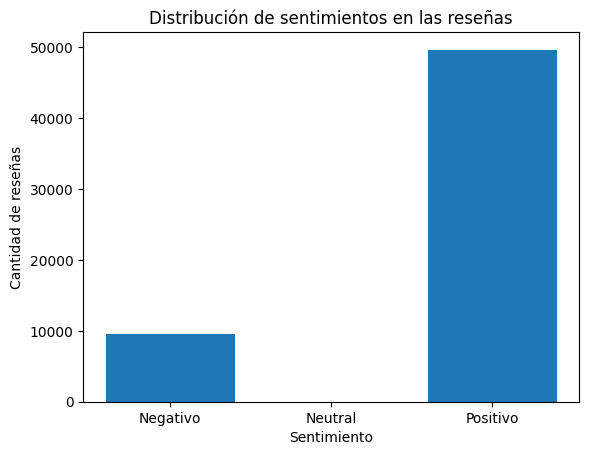

In [62]:

# Contar la cantidad de reseñas con cada sentimiento
sentiment_counts = df_user_reviews['sentiment_score'].value_counts()

# Crear un gráfico de barras para visualizar la distribución de los sentimientos
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xticks([0, 1, 2], ['Negativo', 'Neutral', 'Positivo'])
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de reseñas')
plt.title('Distribución de sentimientos en las reseñas')
plt.show()

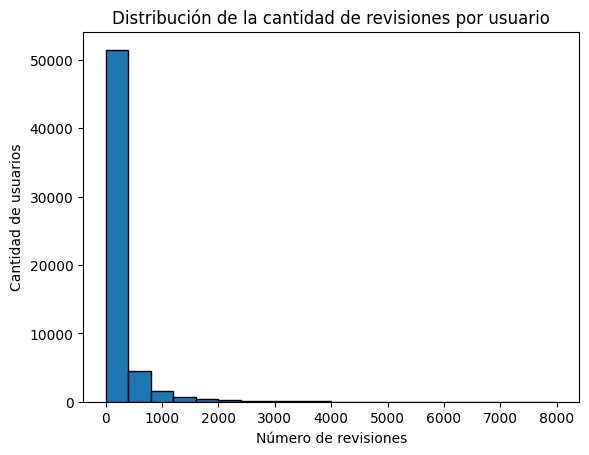

In [63]:

# Calcula la longitud de las listas de revisiones en la columna 'reviews'
review_lengths = df_user_reviews['review'].apply(len)

# Crea un histograma para mostrar la distribución
plt.hist(review_lengths, bins=20, edgecolor='k')
plt.title('Distribución de la cantidad de revisiones por usuario')
plt.xlabel('Número de revisiones')
plt.ylabel('Cantidad de usuarios')
plt.show()


In [64]:
df_user_reviews.columns

Index(['user_id', 'item_id', 'helpful', 'recommend', 'review', 'year_posted',
       'sentiment_score'],
      dtype='object')

In [65]:
# Cambiar el nombre de la columna 'sentiment_score' a 'sentiment_analysis'
df_user_reviews = df_user_reviews.rename(columns={'sentiment_score': 'sentiment_analysis'})


In [66]:
df_user_reviews.columns

Index(['user_id', 'item_id', 'helpful', 'recommend', 'review', 'year_posted',
       'sentiment_analysis'],
      dtype='object')

In [67]:
df_user_reviews

,user_id,item_id,helpful,recommend,review,year_posted,sentiment_analysis
0,76561197970982479,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,2011,2
0,76561197970982479,22200,No ratings yet,True,It's unique and worth a playthrough.,2011,2
0,76561197970982479,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,2011,2
1,js41637,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,2014,2
1,js41637,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,2013,2
...,...,...,...,...,...,...,...
25797,76561198312638244,70,No ratings yet,True,a must have classic from steam definitely wort...,2013,2
25797,76561198312638244,362890,No ratings yet,True,this game is a perfect remake of the original ...,2013,2
25798,LydiaMorley,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,2013,2
25798,LydiaMorley,730,No ratings yet,True,:D,2013,2


In [68]:
df_user_reviews.to_csv('limpio_reviews.csv', index=False) 

In [69]:

# Convertir la columna 'item_id' a cadena de texto (str)
df_user_reviews['item_id'] = df_user_reviews['item_id'].astype(str)

# Convertir la columna 'year_posted' a cadena de texto (str)
df_user_reviews['year_posted'] = df_user_reviews['year_posted'].astype(str)

# DataFrame 'df_user_reviews' se guarda como archivo .parquet
tableA = pa.Table.from_pandas(df_user_reviews)
pq.write_table(tableA, 'limpio_reviews.parquet')


VAMOS CON EL OTRO .JSON STEAM GAMES

In [70]:

# Nombre del archivo JSON que deseas abrir
archivo_json = r'C:\Users\juana\Desktop\Cursos Python\HENRY\Proyecto 1\DATASET\output_steam_games.json'

# Lista para almacenar los datos del archivo JSON
data = []

# Usando la biblioteca json con especificación de codificación UTF-8
with open(archivo_json, 'r', encoding='utf-8') as archivo:
    for line in archivo:
        try:
            # Cargar cada línea como un objeto JSON válido
            obj = json.loads(line)
            data.append(obj)
        except json.JSONDecodeError as e:
            print(f"Error al cargar la línea: {e}")

# Crear un DataFrame a partir de los datos
df_output_steam_games = pd.DataFrame(data)

# Mostrar el DataFrame
print(df_output_steam_games)


              publisher                                 genres  \
0                   NaN                                    NaN   
1                   NaN                                    NaN   
2                   NaN                                    NaN   
3                   NaN                                    NaN   
4                   NaN                                    NaN   
...                 ...                                    ...   
120440  Ghost_RUS Games  [Casual, Indie, Simulation, Strategy]   
120441           Sacada              [Casual, Indie, Strategy]   
120442     Laush Studio            [Indie, Racing, Simulation]   
120443         SIXNAILS                        [Casual, Indie]   
120444              NaN                                    NaN   

                        app_name                     title  \
0                            NaN                       NaN   
1                            NaN                       NaN   
2                    

In [71]:
df_games = df_output_steam_games

In [72]:
# Cantidad de valores nulos (NaN) en el DataFrame
nulos = df_games.isna().sum().sum()

# Cantidad de valores repetidos en la columna 'id'
repetidos = df_games['id'].duplicated().sum()

# Cantidad de celdas vacías en el DataFrame
celdas_vacias = (df_games == '').sum().sum() 

print("Cantidad de valores nulos (NaN):", nulos)
print("Cantidad de valores repetidos en la columna 'id':", repetidos)
print("Cantidad de celdas vacías:", celdas_vacias)


Cantidad de valores nulos (NaN): 1168997
Cantidad de valores repetidos en la columna 'id': 88312
Cantidad de celdas vacías: 0


In [73]:
from datetime import datetime


In [74]:
# Encontrar filas donde la columna 'id' es nula
filas_con_id_nulo = df_games[df_games['id'].isna()]

# Obtener la cantidad de valores nulos en cada columna
nulos = df_games.isnull().sum()
print(nulos)


publisher       96362
genres          91593
app_name        88312
title           90360
url             88310
release_date    90377
tags            88473
reviews_url     88312
specs           88980
price           89687
early_access    88310
id              88312
developer       91609
dtype: int64


In [75]:
df_games.columns

Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'reviews_url', 'specs', 'price', 'early_access', 'id',
       'developer'],
      dtype='object')

In [76]:
# Eliminar filas donde la columna 'id' es nula
df_games.dropna(subset=['id'], inplace=True)

# Eliminar filas duplicadas basadas en la columna 'id'
df_games.drop_duplicates(subset='id', inplace=True)

# Eliminar filas donde todos los valores son nulos
df_games.dropna(how='all', inplace=True)


In [77]:

# Encontrar filas donde la columna 'id' es nula
filas_con_id_nulo = df_games[df_games['id'].isna()]

# Obtener la cantidad de valores nulos en cada columna
nulos = df_games.isnull().sum()
print(nulos)

publisher       8051
genres          3282
app_name           1
title           2049
url                0
release_date    2066
tags             162
reviews_url        0
specs            669
price           1377
early_access       0
id                 0
developer       3298
dtype: int64


In [78]:
# Obtener los valores únicos de la columna 'price'
valores_unicos = df_games['price'].unique()
print(valores_unicos)


[4.99 'Free To Play' 'Free to Play' 0.99 2.99 3.99 9.99 18.99 29.99 nan
 'Free' 10.99 1.59 14.99 1.99 59.99 8.99 6.99 7.99 39.99 19.99 7.49 12.99
 5.99 2.49 15.99 1.25 24.99 17.99 61.99 3.49 11.99 13.99 'Free Demo'
 'Play for Free!' 34.99 74.76 1.49 32.99 99.99 14.95 69.99 16.99 79.99
 49.99 5.0 44.99 13.98 29.96 119.99 109.99 149.99 771.71 'Install Now'
 21.99 89.99 'Play WARMACHINE: Tactics Demo' 0.98 139.92 4.29 64.99
 'Free Mod' 54.99 74.99 'Install Theme' 0.89 'Third-party' 0.5 'Play Now'
 299.99 1.29 3.0 15.0 5.49 23.99 49.0 20.99 10.93 1.39
 'Free HITMAN™ Holiday Pack' 36.99 4.49 2.0 4.0 9.0 234.99 1.95 1.5 199.0
 189.0 6.66 27.99 10.49 129.99 179.0 26.99 399.99 31.99 399.0 20.0 40.0
 3.33 199.99 22.99 320.0 38.85 71.7 59.95 995.0 27.49 3.39 6.0 19.95
 499.99 16.06 4.68 131.4 44.98 202.76 1.0 2.3 0.95 172.24 249.99 2.97
 10.96 10.0 30.0 2.66 6.48 19.29 11.15 18.9 2.89 'Play the Demo' 99.0
 87.94 599.0 8.98 9.69 0.49 9.98 9.95 7.0 'Starting at $499.00'
 'Starting at $449.00' 12.8

In [79]:
# Convertir la columna 'price' a tipo numérico:
df_games['price'] = pd.to_numeric(df_games['price'], errors='coerce')


In [80]:
# Convertir la columna 'price' a tipo de dato cadena (string)
df_games['price'] = df_games['price'].astype(str)

# Reemplazar los valores no numéricos con '0.00' y eliminar caracteres no deseados
df_games['price'] = df_games['price'].apply(lambda x: '0.00' if not x.replace('.', '', 1).isdigit() else x)

# Convertir la columna 'price' a tipo de dato numérico
df_games['price'] = pd.to_numeric(df_games['price'])


In [81]:
# Redondear los valores en la columna 'price' a tres decimales
df_games['price'] = df_games['price'].round(3)


In [82]:
df_games.columns

Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'reviews_url', 'specs', 'price', 'early_access', 'id',
       'developer'],
      dtype='object')

In [83]:
print(df_games[['publisher', 'genres', 'app_name', 'title', 'url', 'release_date','tags', 'reviews_url', 'specs', 'early_access','developer']].all(axis=0))


publisher        True
genres           True
app_name         True
title            True
url              True
release_date     True
tags             True
reviews_url      True
specs            True
early_access    False
developer        True
dtype: bool


In [84]:
# Contar valores nulos (NaN) en la columna 'early_access'
nulos = df_games['early_access'].isnull().sum()

# Contar valores iguales a cero en la columna 'early_access'
ceros = (df_games['early_access'] == 0).sum()

print(f"Valores nulos (NaN) en 'early_access': {nulos}")
print(f"Valores iguales a cero en 'early_access': {ceros}")


Valores nulos (NaN) en 'early_access': 0
Valores iguales a cero en 'early_access': 30185


In [85]:
# Imprimir la columna 'early_access'
print(df_games['early_access'])


88310     False
88311     False
88312     False
88313     False
88314     False
          ...  
120440    False
120441    False
120442    False
120443    False
120444     True
Name: early_access, Length: 32132, dtype: object


In [86]:

# Contar valores False en la columna 'early_access'
valores_false = (df_games['early_access'] == False).sum()

# Calcular el porcentaje en relación a datos reales
total_datos_reales = len(df_games) - df_games['early_access'].isnull().sum()
porcentaje_false_respecto_a_reales = (valores_false / total_datos_reales) * 100

# Imprimir el resultado
print(f"Porcentaje de valores 'False' en 'early_access' en relación a datos reales: {porcentaje_false_respecto_a_reales:.2f}%")


Porcentaje de valores 'False' en 'early_access' en relación a datos reales: 93.94%


In [87]:
# Eliminar la columna 'early_access' del DataFrame
df_games.drop(columns=['early_access'], inplace=True)


In [88]:
df_games.columns

Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'reviews_url', 'specs', 'price', 'id', 'developer'],
      dtype='object')

In [89]:
juegos_gratuitos = df_games[df_games['price'] == 0.00]
print(juegos_gratuitos)


                 publisher                                             genres  \
88311     Making Fun, Inc.               [Free to Play, Indie, RPG, Strategy]   
88312         Poolians.com  [Casual, Free to Play, Indie, Simulation, Sports]   
88319            RewindApp                [Casual, Indie, Racing, Simulation]   
88320              Qucheza          [Action, Indie, Simulation, Early Access]   
88321                  NaN                                                NaN   
...                    ...                                                ...   
120421                 NaN                                           [Sports]   
120431                 NaN                                                NaN   
120433             VersoVR  [Casual, Indie, Simulation, Sports, Early Access]   
120435  Retro Army Limited                         [Action, Adventure, Indie]   
120438            Riviysky                                    [Casual, Indie]   

                           

In [90]:
# Cantidad de valores NaN por fila
nulos_por_fila = df_games.isna().sum(axis=1)

# Imprimir la cantidad de NaN por fila
print("Cantidad de NaN por fila:")
print(nulos_por_fila)


Cantidad de NaN por fila:
88310     0
88311     0
88312     0
88313     0
88314     5
         ..
120440    0
120441    0
120442    0
120443    0
120444    5
Length: 32132, dtype: int64


In [91]:
df_games.columns

Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'reviews_url', 'specs', 'price', 'id', 'developer'],
      dtype='object')

In [92]:
# Eliminar filas con NaN en cualquiera de las columnas especificadas
df_games = df_games.dropna(subset=['publisher', 'genres', 'app_name', 'title', 'url', 'release_date', 'tags', 'reviews_url', 'specs', 'price', 'id', 'developer'], how='any')


In [93]:
# Cantidad de valores nulos (NaN) en el DataFrame
nulos = df_games.isna().sum().sum()

print("Cantidad de valores nulos (NaN):", nulos)


Cantidad de valores nulos (NaN): 0


In [94]:
# Cantidad de valores NaN por fila
nulos_por_fila = df_games.isna().sum(axis=1)

# Imprimir la cantidad de NaN por fila
print("Cantidad de NaN por fila:")
print(nulos_por_fila)


Cantidad de NaN por fila:
88310     0
88311     0
88312     0
88313     0
88315     0
         ..
120439    0
120440    0
120441    0
120442    0
120443    0
Length: 23579, dtype: int64


In [95]:
df_games.columns

Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'reviews_url', 'specs', 'price', 'id', 'developer'],
      dtype='object')

In [96]:
# Usa la función explode para desglosar la columna "genres"
df_games = df_games.explode('genres')

# Ahora puedes ver los elementos únicos en la columna "genres"
elementos_genres = df_games['genres'].unique()
print(elementos_genres)


['Action' 'Casual' 'Indie' 'Simulation' 'Strategy' 'Free to Play' 'RPG'
 'Sports' 'Adventure' 'Racing' 'Early Access' 'Massively Multiplayer'
 'Animation &amp; Modeling' 'Video Production' 'Web Publishing'
 'Education' 'Software Training' 'Utilities' 'Design &amp; Illustration'
 'Audio Production' 'Photo Editing']


In [97]:
# Usar la función explode para desglosar la columna "genres"
df_games = df_games.explode('release_date')

# Obtener elementos únicos en la columna "release_date"
valores = df_games['release_date'].unique()

# Inicializar conjuntos para diferentes tipos de valores
fechas = set()
textos = set()
nans = set()
otros = set()

# Clasificar los valores en los conjuntos apropiados
for valor in valores:
    if isinstance(valor, str):
        fechas.add(valor)
    elif pd.isna(valor):
        nans.add(valor)
    elif isinstance(valor, float):
        otros.add(valor)
    else:
        textos.add(valor)

# Imprimir los resultados
print("Fechas:")
print(fechas)
print("\nValores NaN:")
print(nans)
print("\nValores de tipo texto:")
print(textos)
print("\nOtros valores:")
print(otros)


Fechas:
{'2004-01-20', '2009-04-30', '2014-04-28', '2011-01-13', '2013-10-21', '2004-09-15', '2017-09-04', '2010-05-26', '2017-12-03', '2011-07-22', '2015-03-25', '1993-08-11', '2017-10-09', '2006-08-01', '2011-07-21', '2015-11-28', '2000-01-01', '2015-06-29', '2015-04-22', 'Jul 2016', '2000-05-20', '2014-11-20', '2009-07-20', '2010-11-18', 'Spring 2018', '2011-09-01', '2016-11-22', '2016-01-04', '2015-09-02', '2010-04-08', '2014-04-11', '2008-04-09', '1998-09-01', '1994-03-25', '2008-07-23', '2004-11-30', '2017-10-29', '2009-09-19', '2000-06-30', '2015-10-31', '1986-05-01', '2016-08-28', 'To be announced', '1997-10-09', '2017-01-28', '2017-09-16', '1996-01-02', '2011-12-08', '1995-05-01', '2015-03-03', '2016-01-11', '2013-07-04', '1997-03-31', 'Not yet available', '2013-10-31', '2016-11-21', '2001-04-24', '2004-11-01', '2004-09-17', '2005-10-17', '2014-06-04', '2011-10-28', '2017-05-19', '1997-10-29', '2013-10-10', '2016-07-16', '1996-02-29', '2015-06-25', '2012-04-30', '2015-06-10', 

In [98]:
df_games

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,id,developer
88310,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,761140,Kotoshiro
88310,Kotoshiro,Casual,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,761140,Kotoshiro
88310,Kotoshiro,Indie,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,761140,Kotoshiro
88310,Kotoshiro,Simulation,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,761140,Kotoshiro
88310,Kotoshiro,Strategy,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,761140,Kotoshiro
...,...,...,...,...,...,...,...,...,...,...,...,...
120442,Laush Studio,Indie,Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,610660,Laush Dmitriy Sergeevich
120442,Laush Studio,Racing,Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,610660,Laush Dmitriy Sergeevich
120442,Laush Studio,Simulation,Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,610660,Laush Dmitriy Sergeevich
120443,SIXNAILS,Casual,EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,658870,"xropi,stev3ns"


In [99]:
# Usar la función explode para desglosar la columna "genres"
df_games = df_games.explode('release_date')

# Filtrar solo las filas que contienen fechas válidas
df_games = df_games[df_games['release_date'].str.match(r'\d{4}-\d{2}-\d{2}')]

# Imprimir los resultados
print(df_games)


           publisher      genres             app_name                title  \
88310      Kotoshiro      Action  Lost Summoner Kitty  Lost Summoner Kitty   
88310      Kotoshiro      Casual  Lost Summoner Kitty  Lost Summoner Kitty   
88310      Kotoshiro       Indie  Lost Summoner Kitty  Lost Summoner Kitty   
88310      Kotoshiro  Simulation  Lost Summoner Kitty  Lost Summoner Kitty   
88310      Kotoshiro    Strategy  Lost Summoner Kitty  Lost Summoner Kitty   
...              ...         ...                  ...                  ...   
120442  Laush Studio       Indie        Russian Roads        Russian Roads   
120442  Laush Studio      Racing        Russian Roads        Russian Roads   
120442  Laush Studio  Simulation        Russian Roads        Russian Roads   
120443      SIXNAILS      Casual  EXIT 2 - Directions  EXIT 2 - Directions   
120443      SIXNAILS       Indie  EXIT 2 - Directions  EXIT 2 - Directions   

                                                      url relea

In [100]:
juegos_gratuitos = df_games[df_games['price'] == 0.00]
print(juegos_gratuitos)


                 publisher        genres                 app_name  \
88311     Making Fun, Inc.  Free to Play                Ironbound   
88311     Making Fun, Inc.         Indie                Ironbound   
88311     Making Fun, Inc.           RPG                Ironbound   
88311     Making Fun, Inc.      Strategy                Ironbound   
88312         Poolians.com        Casual  Real Pool 3D - Poolians   
...                    ...           ...                      ...   
120435  Retro Army Limited        Action     The spy who shot me™   
120435  Retro Army Limited     Adventure     The spy who shot me™   
120435  Retro Army Limited         Indie     The spy who shot me™   
120438            Riviysky        Casual                    BAE 2   
120438            Riviysky         Indie                    BAE 2   

                          title  \
88311                 Ironbound   
88311                 Ironbound   
88311                 Ironbound   
88311                 Ironbound

In [101]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57582 entries, 88310 to 120443
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     57582 non-null  object 
 1   genres        57582 non-null  object 
 2   app_name      57582 non-null  object 
 3   title         57582 non-null  object 
 4   url           57582 non-null  object 
 5   release_date  57582 non-null  object 
 6   tags          57582 non-null  object 
 7   reviews_url   57582 non-null  object 
 8   specs         57582 non-null  object 
 9   price         57582 non-null  float64
 10  id            57582 non-null  object 
 11  developer     57582 non-null  object 
dtypes: float64(1), object(11)
memory usage: 5.7+ MB


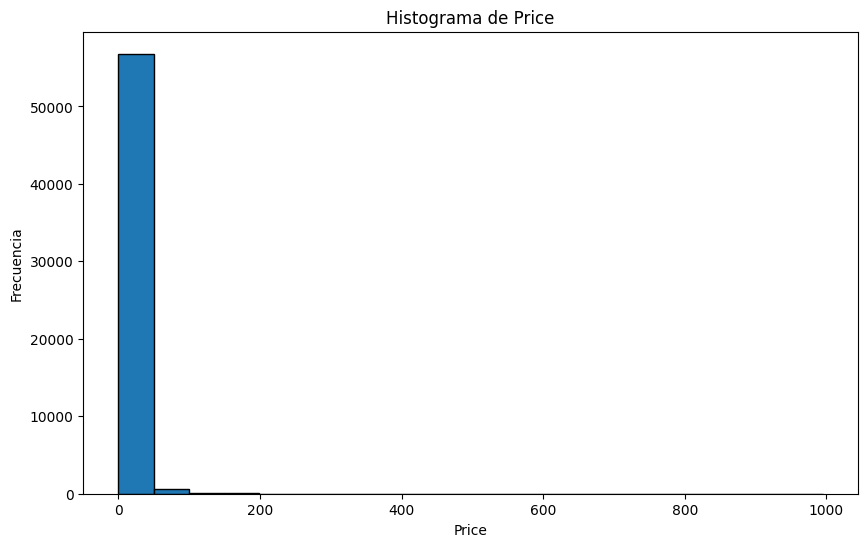

In [102]:
import matplotlib.pyplot as plt

# Crear un histograma para la columna 'price'
plt.figure(figsize=(10, 6))
plt.hist(df_games['price'], bins=20, edgecolor='k')
plt.title('Histograma de Price')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.show()


In [103]:
# Comprobar si hay valores NaN en la columna 'price'
valores_nan_price = df_games['price'].isna().any()

if valores_nan_price:
    print("Sí, hay valores NaN en la columna 'price'.")
else:
    print("No, no hay valores NaN en la columna 'price'.")


No, no hay valores NaN en la columna 'price'.


In [104]:
df_games.to_csv('limpio_games.csv', index=False) 

In [106]:

# DataFrame 'df_user_reviews' se guarda como archivo .parquet
tableG = pa.Table.from_pandas(df_games)
pq.write_table(tableG, 'limpio_games.parquet')